# Temperature evolution

In [1]:
import numpy as np
import sys
import os
sys.path.append(os.getenv("EPOCH_SIMS_HOME"))
from plot_helper import animate_field
from configs.config import *
%config InlineBackend.figure_format = 'retina' # disable this if not using a retina display

In [2]:
# load grid data: fix save grid
grid = np.load(os.path.join(raw_data_folder, "grid.npy"), allow_pickle=True)
x_array, y_array, z_array = grid

## Proton

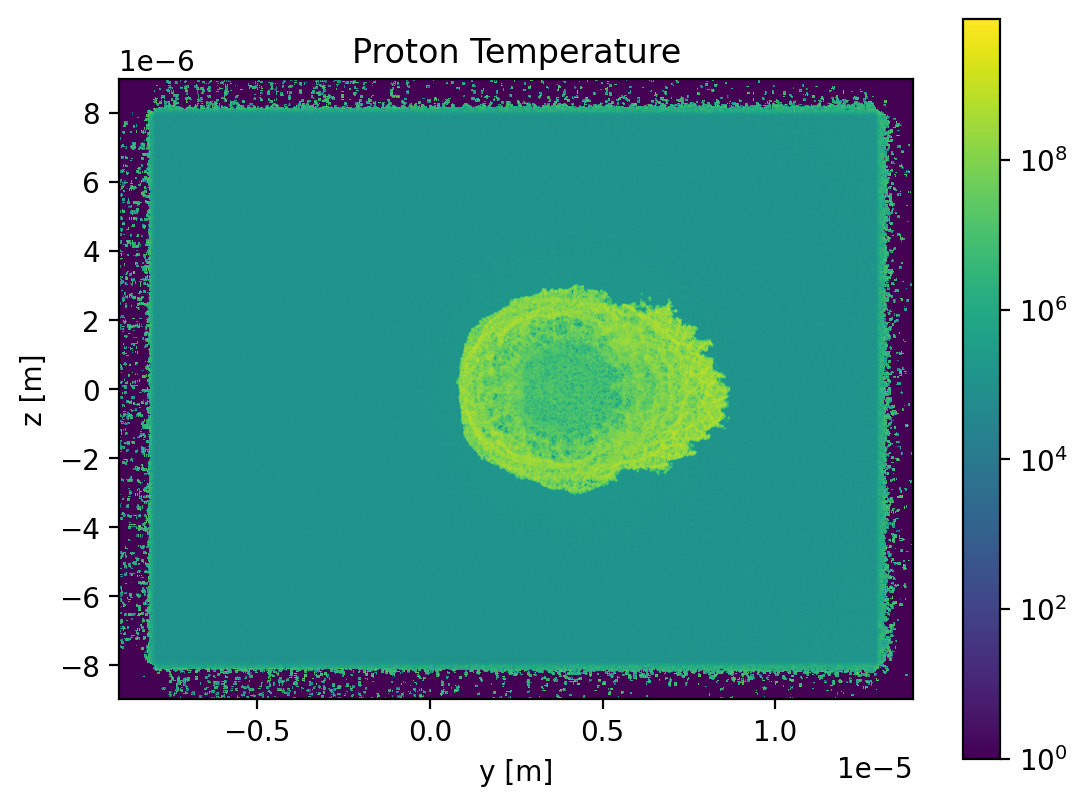

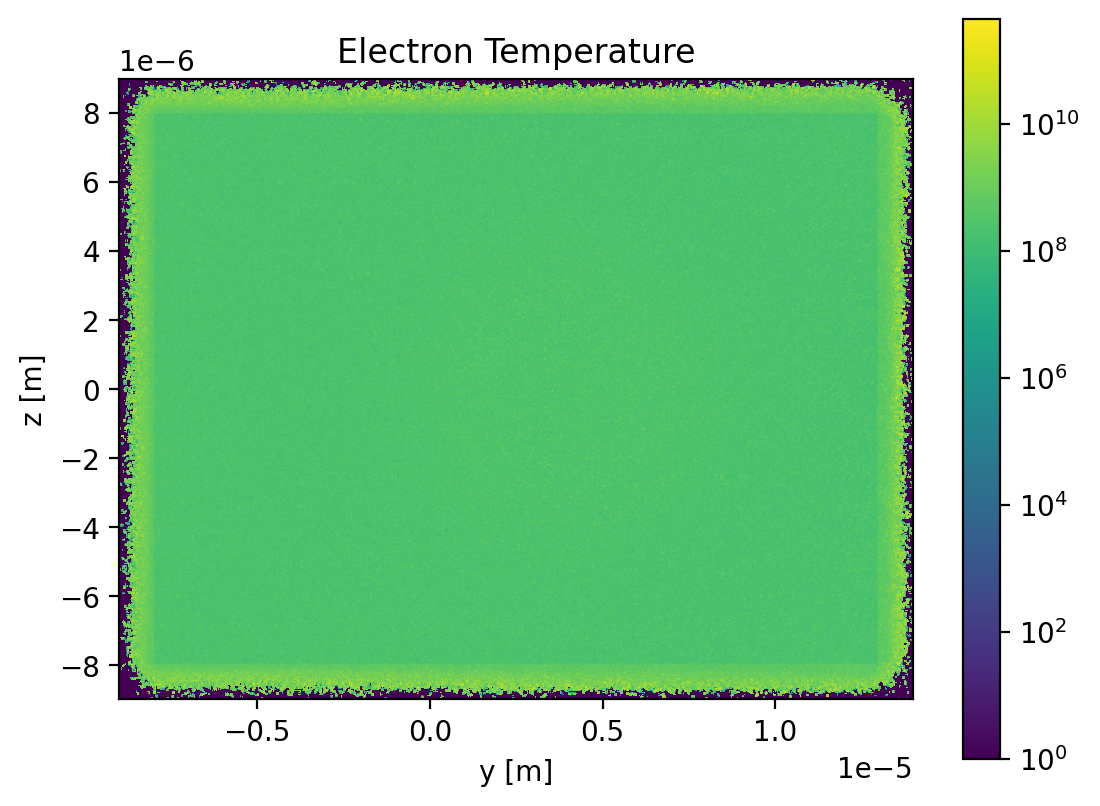

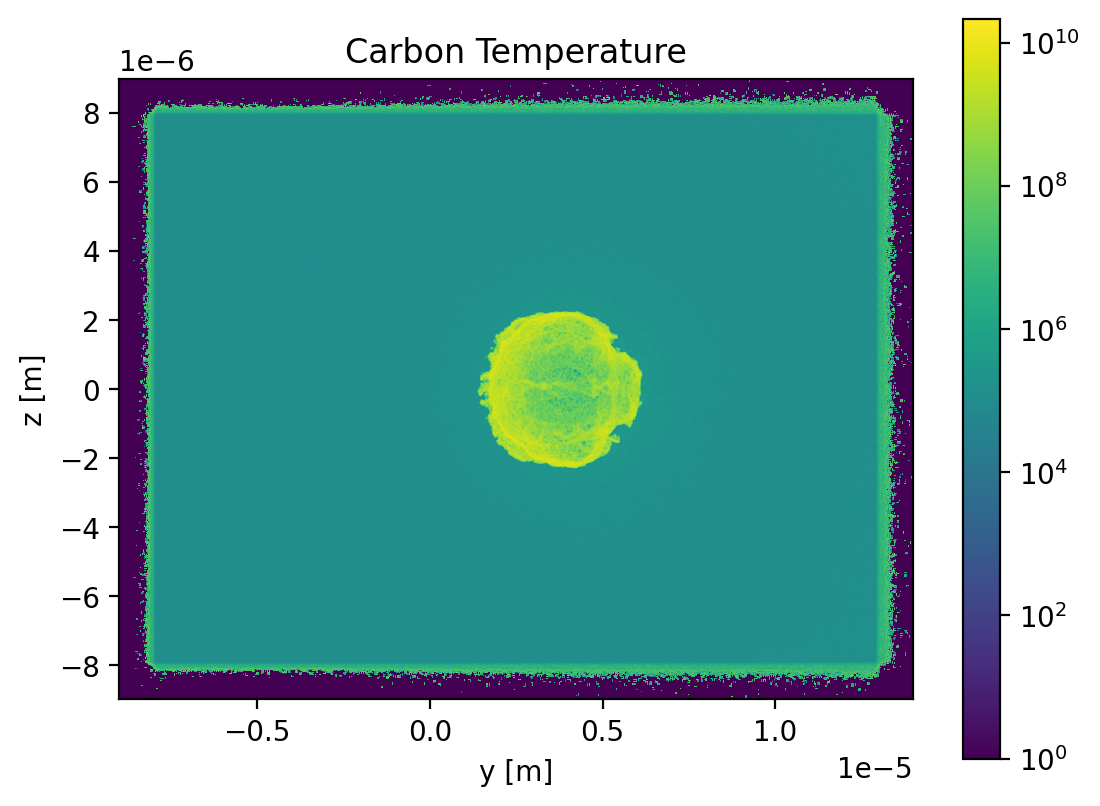

In [3]:
species_list = ["Proton", "Electron", "Carbon"]
temperatures = []
for species in species_list:
    temperature = np.load(
        os.path.join(raw_data_folder, f"{species}_Derived_Temperature_YZ.npy"), allow_pickle=True
    )
    temperatures.append(temperature)
    extent = [y_array[0], y_array[-1], z_array[0], z_array[-1]]
    ani, ax = animate_field(temperature + 1, extent, log_scale=True)
    ax.set_xlabel("y [m]")
    ax.set_ylabel("z [m]")
    ax.set_title(f"{species} Temperature")
    ani.save(os.path.join(media_folder, f"{species.lower()}_tempeature_log_yz.gif"), fps=10, dpi=300)

## All species

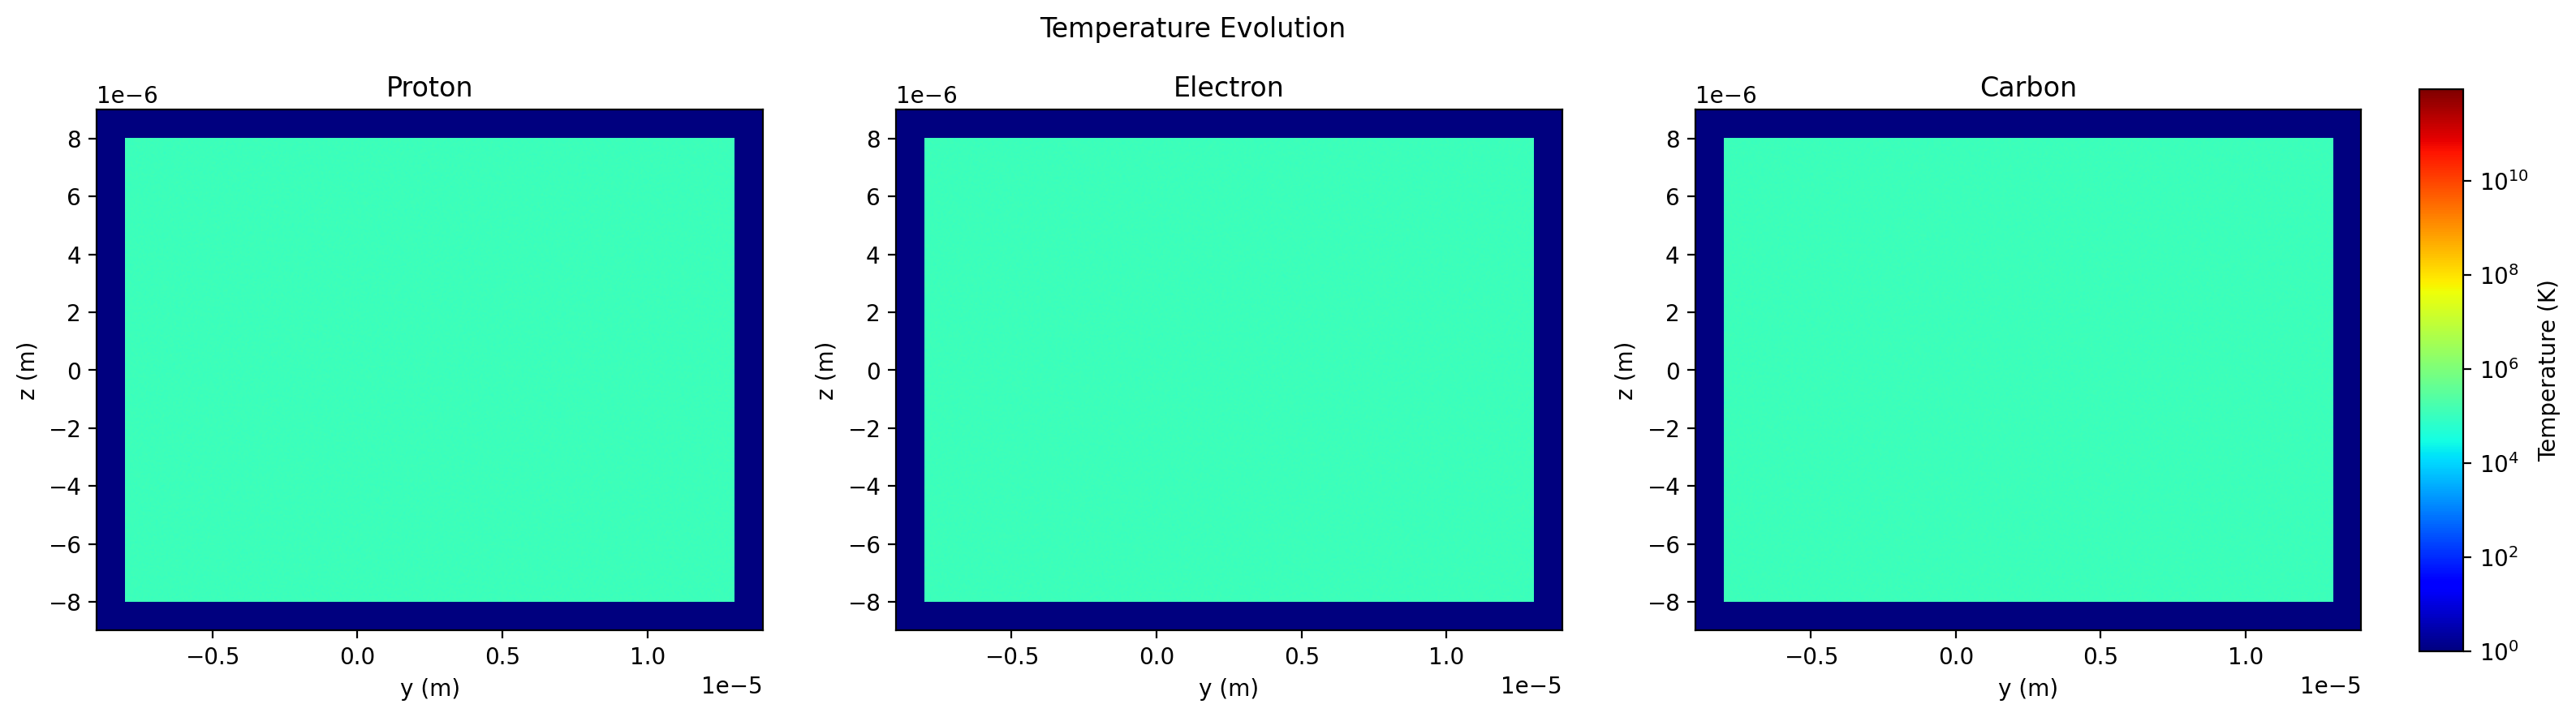

In [4]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
images = []

# Create the initial figure with three subplots and colorbars
vmin = 1
vmax = np.max([np.max(temperature) for temperature in temperatures])
norm = LogNorm(vmin=vmin, vmax=vmax)
cmap = "jet"

fig, axs = plt.subplots(1, 3, figsize=(18, 4.5))
cbar_ax = fig.add_axes([0.92, 0.11, 0.015, 0.77])


for ax, temperature, species in zip(axs, temperatures, species_list):
    img = ax.imshow(
        temperature[0, :, :].T + 1,
        origin="lower",
        extent=[y_array[0], y_array[-1], z_array[0], z_array[-1]],
        interpolation="nearest",
        norm=norm,
        cmap=cmap,
    )
    images.append(img)
    ax.set_title(species)
    ax.set_xlabel("y (m)")
    ax.set_ylabel("z (m)")

fig.colorbar(images[0], cax=cbar_ax, label=r"Temperature (K)")
fig.suptitle("Temperature Evolution")


# Define an update function for the animation
def update(i):
    for img, temperature in zip(images, temperatures):
        img.set_array(temperature[i, :, :].T + 1)


# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(temperature.shape[0]), blit=False)

plt.show()

In [5]:
ani.save(os.path.join(media_folder, "temperature_yz.gif"), fps=10, dpi=300)